In [1]:
import pandas as pd
file_path = "/Users/ejbeazleigh/Desktop/Dissertation/DissertationResults/domesticfootballresults.csv"
data = pd.read_csv(file_path)
#Checking my dataset has all loaded in 
print(data)

      Unnamed: 0        Date  HomeTeam       AwayTeam  FTHG  FTAG  HAMethod1  \
0            0.0  19/08/2000  Charlton       Man City   4.0   0.0        2.0   
1            1.0  19/08/2000   Chelsea       West Ham   4.0   2.0        2.0   
2            2.0  19/08/2000  Coventry  Middlesbrough   1.0   3.0        0.0   
3            3.0  19/08/2000     Derby    Southampton   2.0   2.0        1.0   
4            4.0  19/08/2000     Leeds        Everton   2.0   0.0        2.0   
...          ...         ...       ...            ...   ...   ...        ...   
6840         NaN         NaN       NaN            NaN   NaN   NaN        NaN   
6841         NaN         NaN       NaN            NaN   NaN   NaN        NaN   
6842         NaN         NaN       NaN            NaN   NaN   NaN        NaN   
6843         NaN         NaN       NaN            NaN   NaN   NaN        NaN   
6844         NaN         NaN       NaN            NaN   NaN   NaN        NaN   

      HAMethod2  HAMagnitude   FTR  ...

In [2]:
#Get all feature column headers
data.keys()

Index(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'HAMethod1', 'HAMethod2', 'HAMagnitude ', 'FTR', 'HTGS', 'ATGS', 'HTGC',
       'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1', 'AM2',
       'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr', 'ATFormPtsStr', 'HTFormPts',
       'ATFormPts', 'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3',
       'HTLossStreak5', 'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3',
       'ATLossStreak5', 'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts'],
      dtype='object')

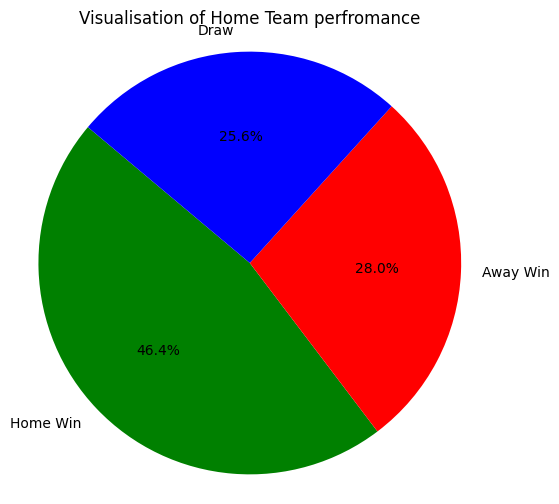

In [3]:
import matplotlib.pyplot as plt
###### Count the frequency of values in the 'HAMethod1' column and create pie chart for visuals ##########

# Mapping of values to labels and colors
value_labels = {0: 'Away Win', 1: 'Draw', 2: 'Home Win'}
value_colors = {0: 'red', 1: 'blue', 2: 'green'}  

hamethod1_counts = data['HAMethod1'].value_counts()

# Create a pie chart with the pre defined lablels and colors
plt.figure(figsize=(6, 6))
plt.pie(hamethod1_counts, labels=[value_labels[val] for val in hamethod1_counts.index],
        autopct='%1.1f%%', startangle=140, colors=[value_colors[val] for val in hamethod1_counts.index])
plt.title('Visualisation of Home Team perfromance')
plt.axis('equal')

# Show the pie chart
plt.show()



In [4]:
#Remove columns from prior corr. analysis stages 
#HA Method 1, HA Method 2, HA Magnitude 

# Remove the specified columns
columns_to_remove = ['HAMethod1', 'HAMethod2', 'HAMagnitude ']
data = data.drop(columns=columns_to_remove)

# Remove rows with NA values
data = data.dropna()

# Reset the index after dropping rows
data = data.reset_index(drop=True)


In [5]:
#recheck ammended columns to see if HA variables werer removed 
data.keys()

Index(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
       'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5', 'HTGD', 'ATGD',
       'DiffPts', 'DiffFormPts'],
      dtype='object')

In [6]:
############################## checking if NA's were removed successfuly #####################

#Count the number of missing values in each column
missing_values_count = data.isna().sum()

# Display the count of missing values in each column
print(missing_values_count)

Unnamed: 0       0
Date             0
HomeTeam         0
AwayTeam         0
FTHG             0
FTAG             0
FTR              0
HTGS             0
ATGS             0
HTGC             0
ATGC             0
HTP              0
ATP              0
HM1              0
HM2              0
HM3              0
HM4              0
HM5              0
AM1              0
AM2              0
AM3              0
AM4              0
AM5              0
MW               0
HTFormPtsStr     0
ATFormPtsStr     0
HTFormPts        0
ATFormPts        0
HTWinStreak3     0
HTWinStreak5     0
HTLossStreak3    0
HTLossStreak5    0
ATWinStreak3     0
ATWinStreak5     0
ATLossStreak3    0
ATLossStreak5    0
HTGD             0
ATGD             0
DiffPts          0
DiffFormPts      0
dtype: int64


/var/folders/h7/pb5zg34j4_x_kt0pszyxqj980000gn/T/ipykernel_35929/4042863835.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot= True)


<AxesSubplot: >

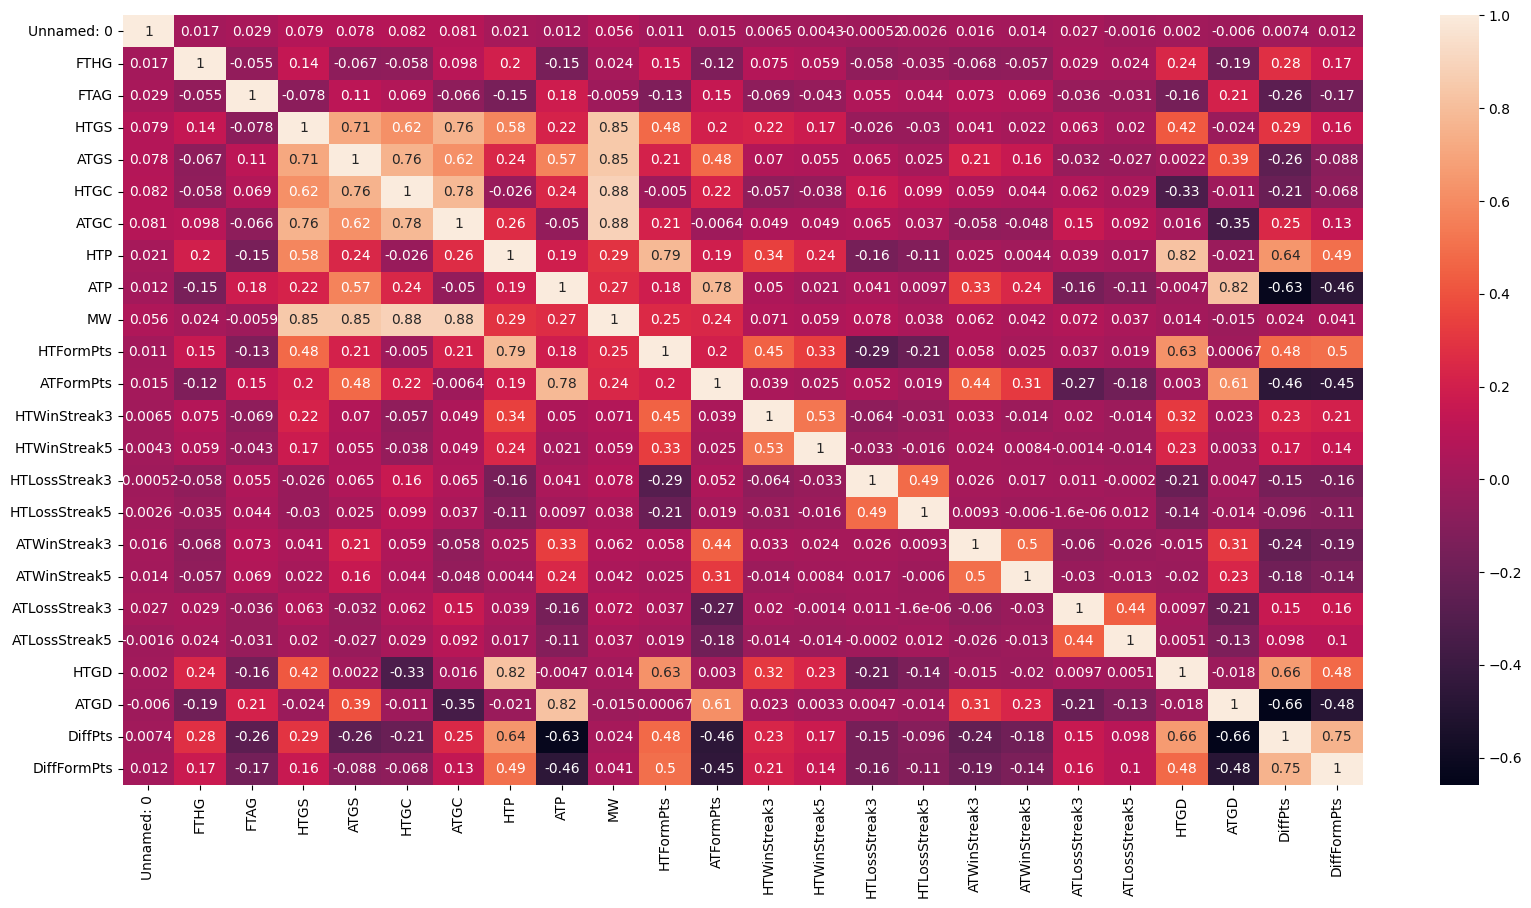

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Correlational matrix 
plt.figure(figsize=(20,10)) 
sns.heatmap(data.corr(), annot= True)


In [8]:
#After interpreting results, remove the following redundant features 
predmodeldata = data.copy().drop(columns =['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HM4', 'HM5','AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3','HTWinStreak5', 'HTLossStreak3', 
        'HTLossStreak5', 'ATWinStreak3','ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5','DiffPts'] )
predmodeldata.keys()

Index(['Unnamed: 0', 'FTR', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'AM1', 'AM2',
       'AM3', 'HTGD', 'ATGD', 'DiffFormPts'],
      dtype='object')

In [9]:
predmodeldata.head(5)

,Unnamed: 0,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts
0,0.0,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
1,1.0,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
2,2.0,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
3,3.0,NH,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0
4,4.0,H,0.0,0.0,M,M,M,M,M,M,0.0,0.0,0.0


In [10]:
# Total number of matches.
Gamesplayed = predmodeldata.shape[0]

# Calculate matches won by home team.
homewins = len(predmodeldata[predmodeldata.FTR == 'H'])
# Calculate win rate for home team.
win_rate = (float(homewins) / (Gamesplayed)) * 100

#Gather interesting statistical attriubtes of my dataset, talking point for early stage of discussion ? 
#Print the results
print("Total number of games: {}".format(Gamesplayed))
print( "Number of Home team wins: {}".format(homewins))
print ("Home Win rate: {:.2f}%".format(win_rate))

Total number of games: 6840
Number of Home team wins: 3176
Home Win rate: 46.43%


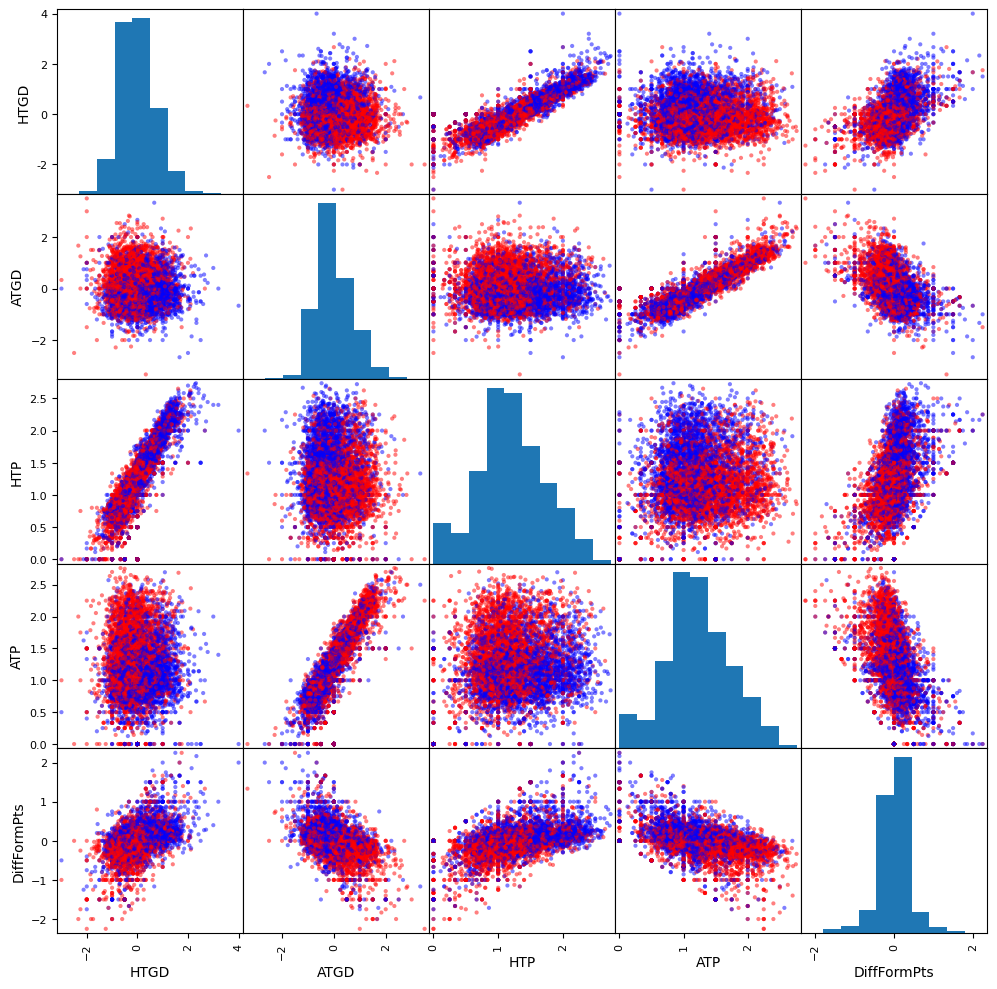

In [11]:
# Import necessary libraries
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Define colors based on the 'FTR' column
colors = predmodeldata['FTR'].map({'H': 'blue', 'NH': 'red'})

# Visualising distribution of data with colors based on 'FTR'
scatter_matrix(data[['HTGD','ATGD','HTP','ATP','DiffFormPts']], figsize=(12,12), c=colors)
plt.show()


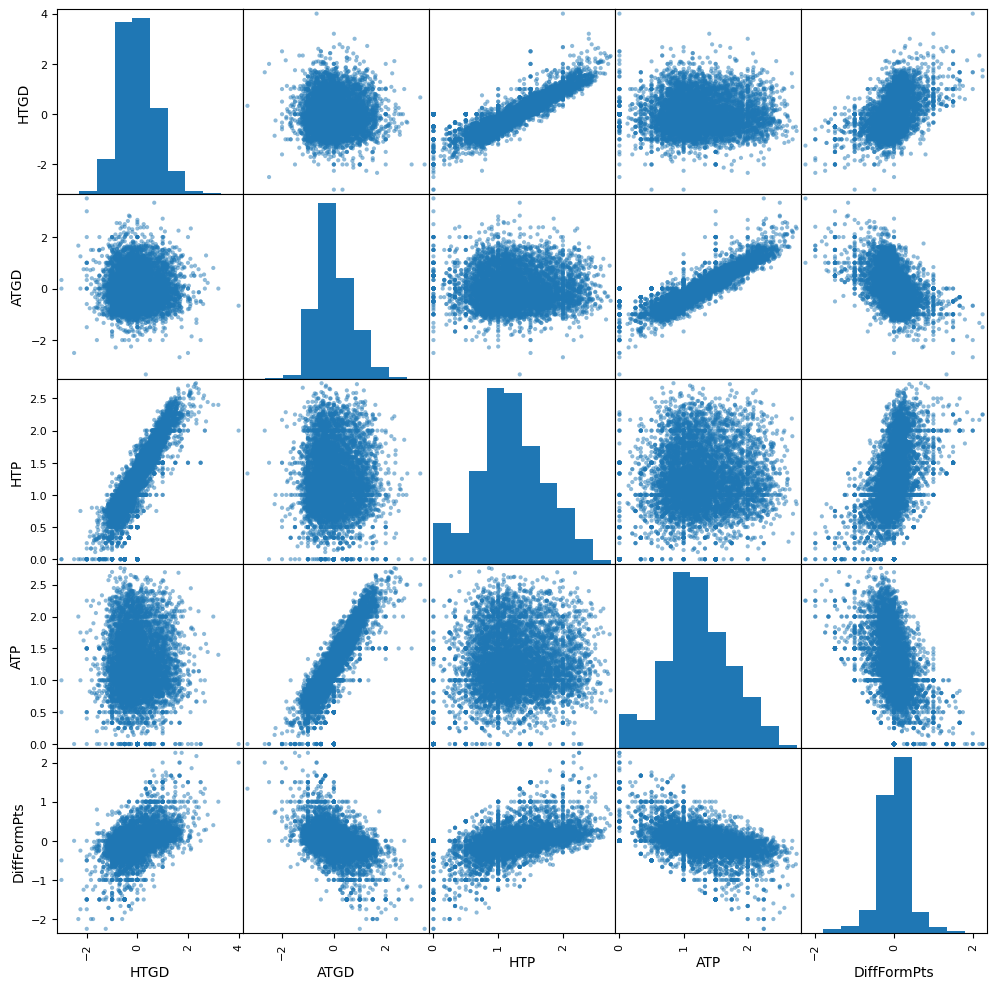

In [11]:
#visualise all atributes against one another,except form related columns, 
#which will facilaitate my ability to observe and interpret relationships 
# Visualising distribution of data
# Visualizing distribution of data
from pandas.plotting import scatter_matrix
scatter_matrix(data[['HTGD','ATGD','HTP','ATP','DiffFormPts']], figsize=(12,12))
plt.show()


In [12]:
print('Checkpoint reached, pre processing stages complete Ed, LETS BUILD SOME MODELS !')
#Models I am using in my research project 
#Logistic regression 
#Suppport Vector Machine (SVM)
#XGBoost
#Random forest ? 
#Neural network - to compare several traditional machine learning models (random forest, SVM, etc.) 
# against the use Keras to develop neural network models

Checkpoint reached, pre processing stages complete Ed, LETS BUILD SOME MODELS !


In [13]:
################PRE PROCESSING DATA##################PRE PROCESSING DATA#####################
# Separate into feature set and target variable FTR (target variable;H, NH) as approaching this task
#as a multiclass classification task in terms of the home teams 2 possible outcomes 
X_all = predmodeldata.drop(['FTR'],1)
y_all = predmodeldata['FTR']
from sklearn.preprocessing import scale
# Standardising the data.
#Center to the mean and component wise scale to unit variance.
cols = [['HTGD','ATGD','HTP','ATP']]
for col in cols:
    X_all[col] = scale(X_all[col])

/var/folders/h7/pb5zg34j4_x_kt0pszyxqj980000gn/T/ipykernel_1859/2988464758.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_all = predmodeldata.drop(['FTR'],1)


In [14]:
#last 3 wins for both sides
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')

#want continous vars that are integers for input data, so remove categorical vars
def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (30 total features):
['Unnamed: 0', 'HTP', 'ATP', 'HM1_D', 'HM1_L', 'HM1_M', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_M', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_M', 'HM3_W', 'AM1_D', 'AM1_L', 'AM1_M', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_M', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_M', 'AM3_W', 'HTGD', 'ATGD', 'DiffFormPts']


/var/folders/h7/pb5zg34j4_x_kt0pszyxqj980000gn/T/ipykernel_1859/1368799336.py:17: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, col_data in X.iteritems():


In [15]:
# Show the feature information by printing the first five rows
print ("\nFeature values:")
display(X_all.head())


Feature values:


,Unnamed: 0,HTP,ATP,HM1_D,HM1_L,HM1_M,HM1_W,HM2_D,HM2_L,HM2_M,...,AM2_L,AM2_M,AM2_W,AM3_D,AM3_L,AM3_M,AM3_W,HTGD,ATGD,DiffFormPts
0,0.0,-2.280523,-2.345017,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0.013972,-0.020983,0.0
1,1.0,-2.280523,-2.345017,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0.013972,-0.020983,0.0
2,2.0,-2.280523,-2.345017,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0.013972,-0.020983,0.0
3,3.0,-2.280523,-2.345017,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0.013972,-0.020983,0.0
4,4.0,-2.280523,-2.345017,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0.013972,-0.020983,0.0


In [15]:
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
trainX, testX, trainY, testY = train_test_split(X_all, y_all, test_size=0.2, random_state=2, stratify=y_all)

In [72]:
#################Random Forest Model defining###########################
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Creating parameters list for tuning
parameters = {'n_estimators': [10, 100, 250, 500],'max_depth': [None, 10, 20],'min_samples_split': [1, 10, 20],
              'min_samples_leaf': [1, 2, 4],'criterion': ['gini','entropy'],'max_features': ['auto', 'sqrt']}

# Initialize the classifier
RFclassifier = RandomForestClassifier(random_state=1, n_jobs=-1)

# f1 scoring function using 'make_scorer'to eval the perf of paramater sets
f1_scorer = make_scorer(f1_score, pos_label='H')

#  Perform grid search on the classifier using the f1_scorer as the scoring method
gridsearch = GridSearchCV(RFclassifier,scoring=f1_scorer,param_grid=parameters,cv=2)

#  Fit the grid search object to the training data and find the optimal parameters
gridsearch = gridsearch.fit(trainX, trainY)

# Get the best estimator from grid search
bestRFclassifier = gridsearch.best_estimator_
print(bestRFclassifier)

# Get predictions on the test set
predictions = bestRFclassifier.predict(testX)

# Compute evaluation metrics
f1 = f1_score(testY, predictions, pos_label='H')
accuracy = accuracy_score(testY, predictions)
recall = recall_score(testY, predictions, pos_label='H')
precision = precision_score(testY, predictions, pos_label='H')



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour

RandomForestClassifier(max_features='auto', min_samples_split=1,
                       n_estimators=10, n_jobs=-1, random_state=1)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



F1-score: 0.5725018782870023
Overall Accuracy: 0.5840643274853801
Recall: 0.6
Precision: 0.5474137931034483


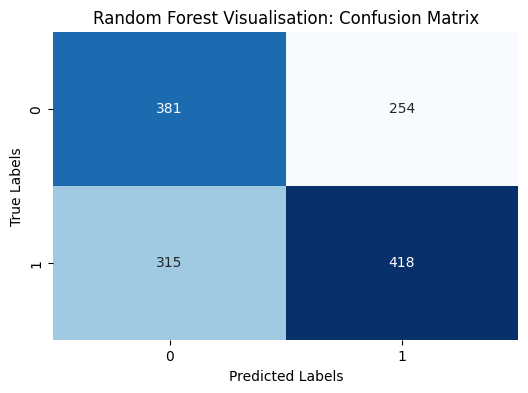

In [73]:
##################Random Forest Results & Visualisation ####################
# Print the evaluation metrics
print("F1-score:", f1)
print("Overall Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)

# Create a confusion matrix
confusion = confusion_matrix(testY, predictions)
# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Visualisation: Confusion Matrix')
plt.show()

In [23]:
#################SVM Model defining###########################
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
# Create the parameters list you wish to tune
SVMparameters = {'C': [0.1, 1, 10,100],'gamma': [0.01, 0.1, 1, 10],'kernel': ['rbf','sigmoid']}
#{'C': [0.1, 1, 10],'kernel': ['rbf', 'poly','sigmoid']}

#  Initialize the classifier
SVMclassifier = SVC(random_state=1)

# f1 scoring function using 'make_scorer'
f1_scorer = make_scorer(f1_score, pos_label='H')
# Perform grid search on the classifier using the f1_scorer as the scoring method
SVMgridsearch = GridSearchCV(SVMclassifier,scoring=f1_scorer,param_grid=SVMparameters,cv=2)
#Taking a while .... progress marker 
print('checkpoint ed')
# Fit the grid search object to the training data, find and print the optimal parameters
SVMgridsearch = grid_obj.fit(trainX, trainY)
best_params = SVMgridsearch.best_params_
print("Best Hyperparameters:", best_params)

#Taking a while .... progress marker 
print('gridsearch finished ed, now to fit results to data')

# Get the best estimator from grid search
bestSVMclassifier = SVMgridsearch.best_estimator_
print(bestSVMclassifier)

# Get predictions on the test set
SVMpredictions = bestSVMclassifier.predict(testX)

# Compute evaluation metrics
f1 = f1_score(testY, SVMpredictions, pos_label='H')
accuracy = accuracy_score(testY, SVMpredictions)
recall = recall_score(testY, SVMpredictions, pos_label='H')
precision = precision_score(testY, SVMpredictions, pos_label='H')

checkpoint ed
Best Hyperparameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
gridsearch finished ed, now to fit results to data
SVC(C=100, gamma=0.01, random_state=1)


F1-score: 0.5320121951219512
Overall Accuracy: 0.5511695906432749
Recall: 0.5496062992125984
Precision: 0.5155096011816839


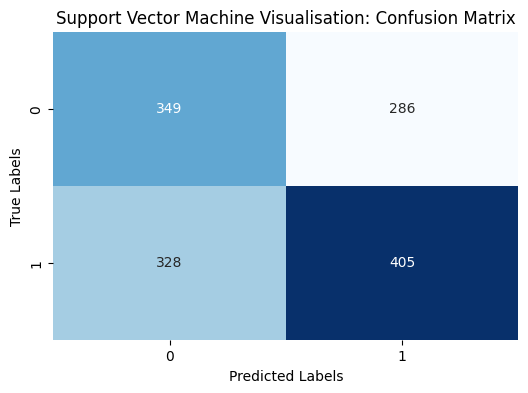

In [24]:
################## SVM Results & Visualisation ####################
# Print the evaluation metrics
print("F1-score:", f1)
print("Overall Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)

# Create a confusion matrix
confusion = confusion_matrix(testY, predictions)

# Visualize the confusion matrix with adjusted size
plt.figure(figsize=(6, 4))  # Adjust the figure size here
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Support Vector Machine Visualisation: Confusion Matrix')
plt.show()

In [29]:
pip install xgboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 106.4 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [28]:
#################XGBOOST Model defining###########################

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import xgboost as xgb 


################ Recieved error with binary data in target variable Y (FTR)
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the encoder on the training data
label_encoder.fit(trainY)
# Encode true labels for both training and testing data
trainY_encoded = label_encoder.transform(trainY)
testY_encoded = label_encoder.transform(testY)

# Creating tuning parameters list 
XGBparameters = {'learning_rate': [0.1],'n_estimators': [40],'max_depth': [3],'min_child_weight': [3],
    'gamma': [0.4],'subsample': [0.8],'colsample_bytree': [0.8],'scale_pos_weight': [1],'reg_alpha': [1e-5]}

# Initialize the classifier
XGBclassifier = xgb.XGBClassifier(seed=2)

# f1 scoring function using 'make_scorer'
f1_scorer = make_scorer(f1_score, pos_label=1)
# Perform grid search on the classifier using the f1_scorer as the scoring method
XGBgridsearch = GridSearchCV(XGBclassifier,scoring=f1_scorer,param_grid=XGBparameters,cv=5)
# Fit the grid search object to the training data and find the optimal parameters
XGBgridsearch = XGBgridsearch.fit(trainX, trainY_encoded)
# Get the best estimator from grid search
best_classifier = XGBgridsearch.best_estimator_
print(best_classifier)

# Get predictions on the test set
XGBpredictions = best_classifier.predict(testX)

# Compute evaluation metrics
f1 = f1_score(testY_encoded, XGBpredictions, pos_label=1)
accuracy = accuracy_score(testY_encoded, XGBpredictions)
recall = recall_score(testY_encoded, XGBpredictions, pos_label=1)
precision = precision_score(testY_encoded, XGBpredictions, pos_label=1)
confusion = confusion_matrix(testY_encoded, XGBpredictions)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=40, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


F1-score: 0.6935687263556116
Overall Accuracy: 0.6447368421052632
Recall: 0.7503410641200545
Precision: 0.6447831184056272


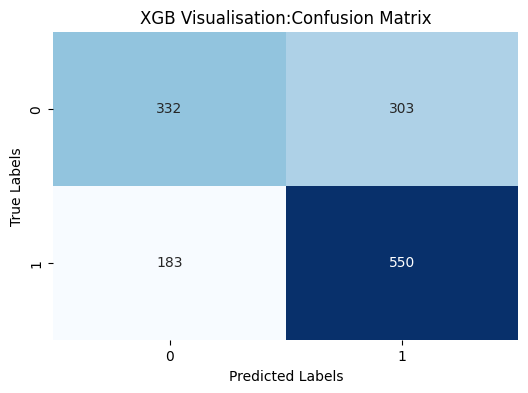

In [29]:
##################XGBOOST Results & Visualisation ####################
# Print evaluation metrics and visualize the confusion matrix
print("F1-score:", f1)
print("Overall Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('XGB Visualisation:Confusion Matrix')
plt.show()


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_all)
target = to_categorical(y_encoded)

# Generate sequences and labels
time_steps = 3
X_sequences = []
y_sequences = []

for i in range(len(X_all) - time_steps + 1):
    sequence = X_all.iloc[i:i+time_steps].values
    label = target[i+time_steps-1]  # Use the encoded target variable
    
    X_sequences.append(sequence)
    y_sequences.append(label)

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

# Print the shape of X_sequences
print("Shape of X_sequences:", X_sequences.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=2, stratify=y_sequences)

# Print the shape of X_train
print("Shape of X_train:", X_train.shape)

print("Number of sequences:", len(X_sequences))
print("Length of X_train:", len(X_train))
print("Length of y_train:", len(y_train))
print("Length of X_test:", len(X_test))
print("Length of y_test:", len(y_test))



2023-08-28 14:11:47.109562: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Shape of X_sequences: (6838, 3, 30)
Shape of X_train: (5470, 3, 30)
Number of sequences: 6838
Length of X_train: 5470
Length of y_train: 5470
Length of X_test: 1368
Length of y_test: 1368


In [19]:
print("Shape of X_all:", X_all.shape)


Shape of X_all: (6840, 30)


In [26]:
# Define the number of features
num_features = X_all.shape[1]

# Define RNN hyperparameters
num_units = 64  # Number of units in the LSTM layers
num_classes = 2  # Number of classes (Home Wins and Not Home Wins)
num_epochs = 1000  # Number of training epochs
batch_size = 64  # Batch size for training
input_shape = (time_steps, num_features)  # Shape of input data for the first LSTM layer

########################################## RNN model time ################################
# Build the RNN model
model = Sequential()

# Add LSTM layers
model.add(LSTM(units=num_units, return_sequences=True, input_shape=input_shape))
model.add(LSTM(units=num_units))
# Add a dense output layer
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)
# Make predictions
y_pred = model.predict(X_test)
# Convert predictions to labels
y_pred_labels = [label_encoder.inverse_transform([y.argmax()])[0] for y in y_pred]
y_true_labels = label_encoder.inverse_transform(y_test.argmax(axis=1))

# Calculate evaluation metrics
accuracy = accuracy_score(y_true_labels, y_pred_labels)
f1 = f1_score(y_true_labels, y_pred_labels, pos_label='H')
recall = recall_score(y_true_labels, y_pred_labels, pos_label='H')
precision = precision_score(y_true_labels, y_pred_labels, pos_label='H')
confusion = confusion_matrix(y_true_labels, y_pred_labels)



2023-08-31 02:28:00.923428: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-31 02:28:00.925718: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-31 02:28:00.927182: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/1000


2023-08-31 02:28:01.876977: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-31 02:28:01.878558: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-31 02:28:01.880167: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

86/86 [==============================] - 8s 14ms/step - loss: 0.6931 - accuracy: 0.5238
Epoch 2/1000
86/86 [==============================] - 1s 15ms/step - loss: 0.6916 - accuracy: 0.5360
Epoch 3/1000
86/86 [==============================] - 1s 11ms/step - loss: 0.6915 - accuracy: 0.5318
Epoch 4/1000
86/86 [==============================] - 1s 9ms/step - loss: 0.6911 - accuracy: 0.5333
Epoch 5/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.6919 - accuracy: 0.5245
Epoch 6/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.6925 - accuracy: 0.5258
Epoch 7/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.6911 - accuracy: 0.5313
Epoch 8/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.6914 - accuracy: 0.5285
Epoch 9/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.6906 - accuracy: 0.5305
Epoch 10/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.6908 - accuracy: 0.5333
Epoch 11/

86/86 [==============================] - 1s 7ms/step - loss: 0.6542 - accuracy: 0.6073
Epoch 83/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.6405 - accuracy: 0.6260
Epoch 84/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.6500 - accuracy: 0.6197
Epoch 85/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.6412 - accuracy: 0.6261
Epoch 86/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.6585 - accuracy: 0.5761
Epoch 87/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.6465 - accuracy: 0.6004
Epoch 88/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.6513 - accuracy: 0.6117
Epoch 89/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.6439 - accuracy: 0.6130
Epoch 90/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.6486 - accuracy: 0.6137
Epoch 91/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.6374 - accuracy: 0.6404
Epoc

86/86 [==============================] - 1s 8ms/step - loss: 0.6192 - accuracy: 0.6506
Epoch 243/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.6129 - accuracy: 0.6611
Epoch 244/1000
86/86 [==============================] - 1s 8ms/step - loss: 0.6226 - accuracy: 0.6468
Epoch 245/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.6190 - accuracy: 0.6499
Epoch 246/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.6238 - accuracy: 0.6397
Epoch 247/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.6254 - accuracy: 0.6463
Epoch 248/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.6274 - accuracy: 0.6521
Epoch 249/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.6253 - accuracy: 0.6530
Epoch 250/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.6268 - accuracy: 0.6558
Epoch 251/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.6259 - accuracy: 0.

86/86 [==============================] - 1s 7ms/step - loss: 0.6074 - accuracy: 0.6601
Epoch 403/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.6103 - accuracy: 0.6548
Epoch 404/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.6083 - accuracy: 0.6609
Epoch 405/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.6061 - accuracy: 0.6640
Epoch 406/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.6069 - accuracy: 0.6616
Epoch 407/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.6053 - accuracy: 0.6614
Epoch 408/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.6038 - accuracy: 0.6607
Epoch 409/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.6014 - accuracy: 0.6682
Epoch 410/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.6085 - accuracy: 0.6580
Epoch 411/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.6111 - accuracy: 0.

86/86 [==============================] - 1s 14ms/step - loss: 0.5943 - accuracy: 0.6718
Epoch 563/1000
86/86 [==============================] - 1s 14ms/step - loss: 0.5975 - accuracy: 0.6662
Epoch 564/1000
86/86 [==============================] - 1s 14ms/step - loss: 0.5984 - accuracy: 0.6684
Epoch 565/1000
86/86 [==============================] - 1s 9ms/step - loss: 0.5927 - accuracy: 0.6680
Epoch 566/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.6041 - accuracy: 0.6658
Epoch 567/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.5952 - accuracy: 0.6653
Epoch 568/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.5954 - accuracy: 0.6675
Epoch 569/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.5912 - accuracy: 0.6713
Epoch 570/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.5932 - accuracy: 0.6731
Epoch 571/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.5998 - accuracy:

86/86 [==============================] - 1s 15ms/step - loss: 0.5897 - accuracy: 0.6700
Epoch 723/1000
86/86 [==============================] - 1s 14ms/step - loss: 0.5890 - accuracy: 0.6728
Epoch 724/1000
86/86 [==============================] - 1s 7ms/step - loss: 0.5864 - accuracy: 0.6779
Epoch 725/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.5844 - accuracy: 0.6788
Epoch 726/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.5903 - accuracy: 0.6675
Epoch 727/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.5888 - accuracy: 0.6751
Epoch 728/1000
86/86 [==============================] - 1s 6ms/step - loss: 0.5874 - accuracy: 0.6739
Epoch 729/1000
86/86 [==============================] - 1s 9ms/step - loss: 0.5871 - accuracy: 0.6740
Epoch 730/1000
86/86 [==============================] - 1s 14ms/step - loss: 0.5878 - accuracy: 0.6766
Epoch 731/1000
86/86 [==============================] - 1s 14ms/step - loss: 0.5883 - accuracy

86/86 [==============================] - 1s 14ms/step - loss: 0.5931 - accuracy: 0.6764
Epoch 881/1000
86/86 [==============================] - 1s 14ms/step - loss: 0.5887 - accuracy: 0.6739
Epoch 882/1000
86/86 [==============================] - 1s 14ms/step - loss: 0.5873 - accuracy: 0.6788
Epoch 883/1000
86/86 [==============================] - 1s 15ms/step - loss: 0.5854 - accuracy: 0.6781
Epoch 884/1000
86/86 [==============================] - 1s 14ms/step - loss: 0.5836 - accuracy: 0.6781
Epoch 885/1000
86/86 [==============================] - 1s 14ms/step - loss: 0.5864 - accuracy: 0.6759
Epoch 886/1000
86/86 [==============================] - 1s 16ms/step - loss: 0.5842 - accuracy: 0.6777
Epoch 887/1000
86/86 [==============================] - 1s 14ms/step - loss: 0.5944 - accuracy: 0.6781
Epoch 888/1000
86/86 [==============================] - 1s 14ms/step - loss: 0.5929 - accuracy: 0.6771
Epoch 889/1000
86/86 [==============================] - 1s 15ms/step - loss: 0.5934 - ac

2023-08-31 02:46:27.461467: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-31 02:46:27.465665: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-31 02:46:27.469211: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

43/43 [==============================] - 2s 6ms/step


Test Accuracy: 0.6440058479532164
F1 Score: 0.5576748410535877
Recall: 0.48346456692913387
Precision: 0.6587982832618026


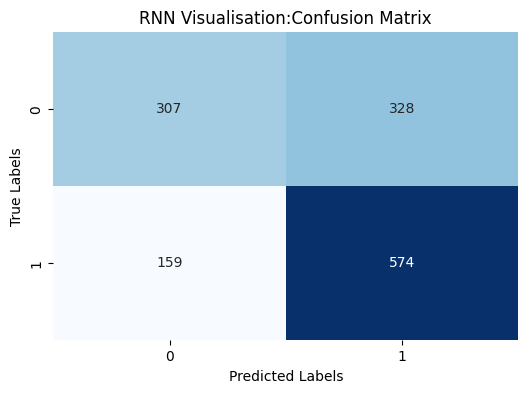

In [27]:
##################Neural network Results & Visualisation ####################
print('Test Accuracy:', accuracy)
print('F1 Score:', f1)
print('Recall:', recall)
print('Precision:', precision)

# Compute the confusion matrix
confusion = confusion_matrix(y_true_labels, y_pred_labels)

# Visualize the confusion matrix with adjusted size
plt.figure(figsize=(6, 4))  # Adjust the figure size here
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('RNN Visualisation:Confusion Matrix')
plt.show()
